In [1]:
import sys
sys.path.append("./../../utils/")
sys.path.append("./../../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline
%cd  .. 
%cd ..

/Users/timw/Documents/University/thesis_2/scripts
/Users/timw/Documents/University/thesis_2


## Parameters

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp1"
args.fix_seed = 2024
args.itr = 1

# Data loading
args.from_raw = True
args.file_name = "smard_data.csv"
from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "linreg"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [['load', 'solar_gen', "wind_gen"], ['load'], ['solar_gen'], ['wind_gen']]
args.window_size = 336
args.stride = 1 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train linreg on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 96, 192, 336, 720] ----------
                     mae       mse
target horizon                    
load   24       0.273192  0.202552
       96       0.406976  0.400234
       192      0.450249  0.465195
       336      0.474157  0.496639
       720      0.497661  0.519830
------- Starting to train linreg on ['load'] for horizons [24, 96, 192, 336, 720] ----------
                     mae       mse
target horizon                    
load   24       0.273192  0.202552
       96       0.406976  0.400234
       192      0.450249  0.465195
       336      0.474157  0.496639
       720      0.497661  0.519830
       24       0.141791  0.045733
       96       0.189751  0.077753
       192      0.210347  0.093381
       336      0.229741  0.106144
       720      0.252441  0.119570
------- Starting to train linreg on ['solar_gen'] for horizons [24, 96, 192, 336, 720] ----------
                        ma

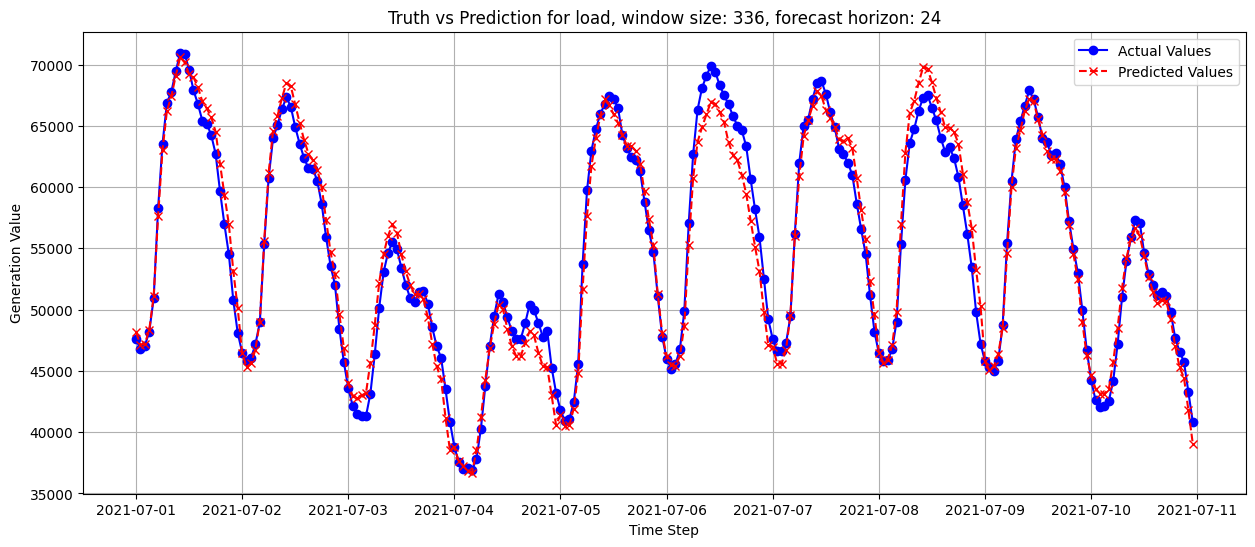

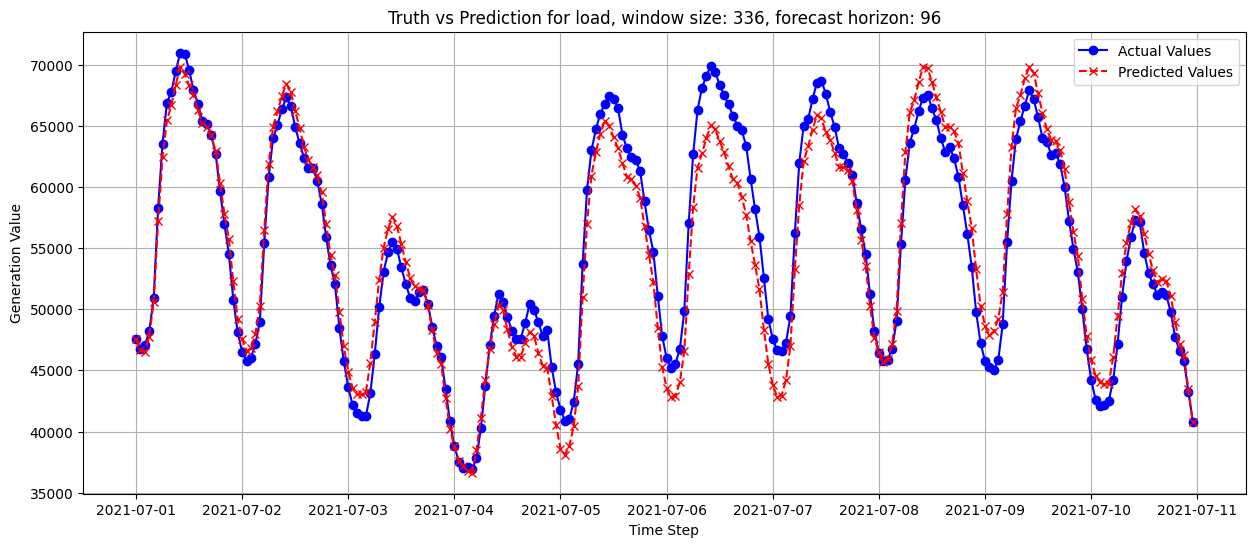

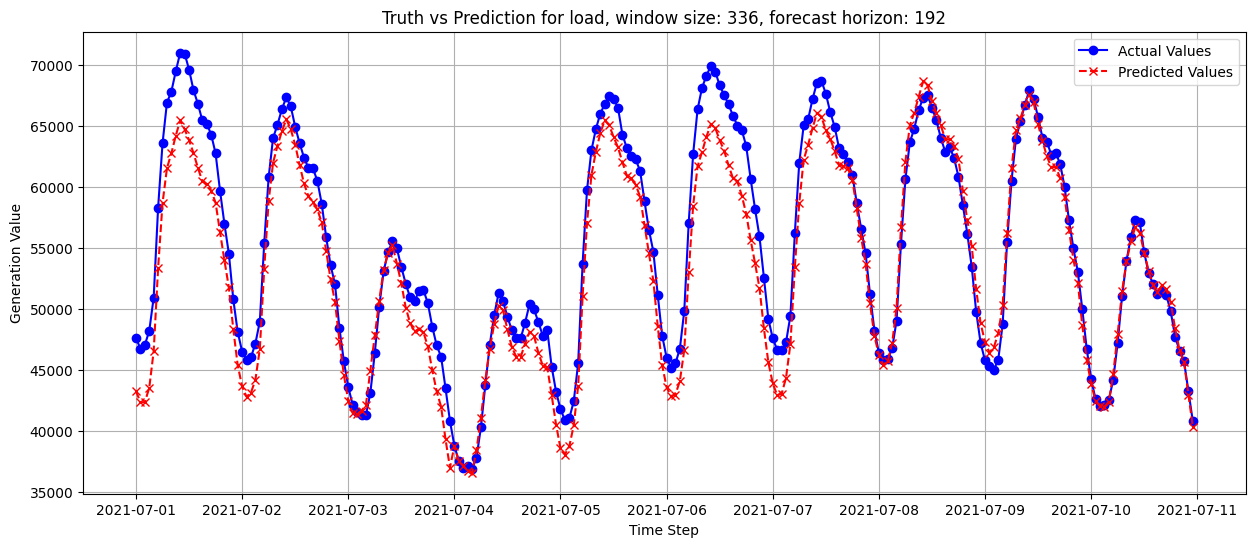

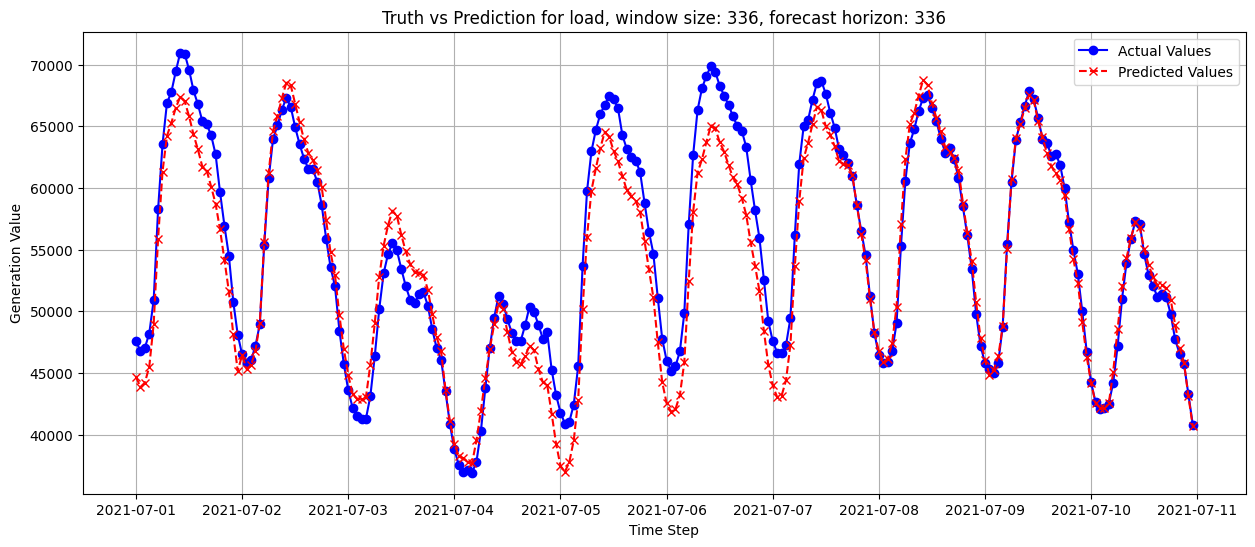

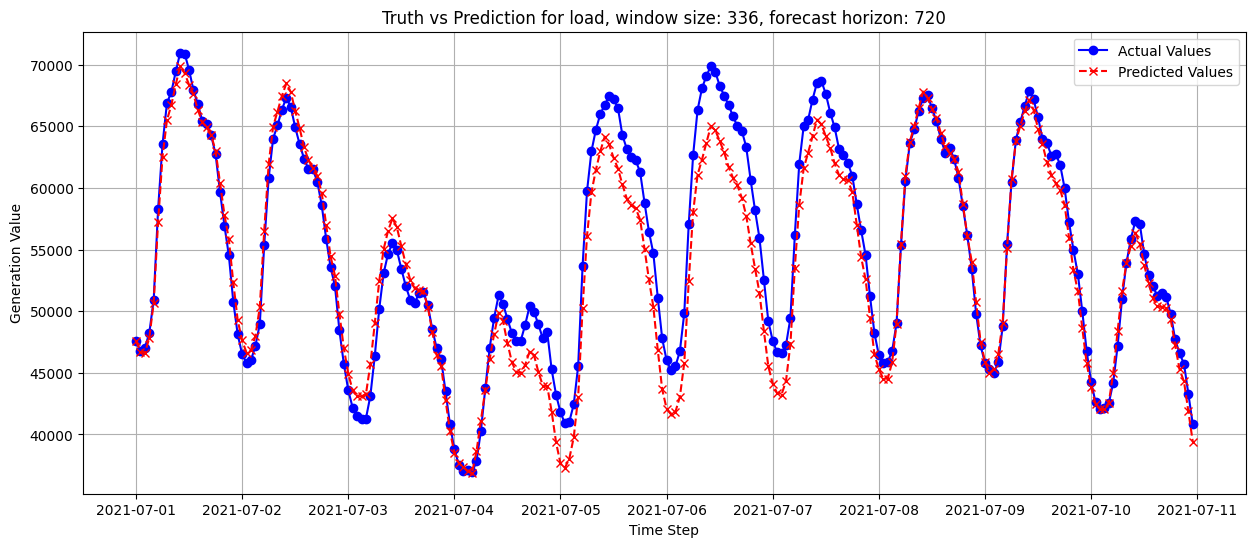

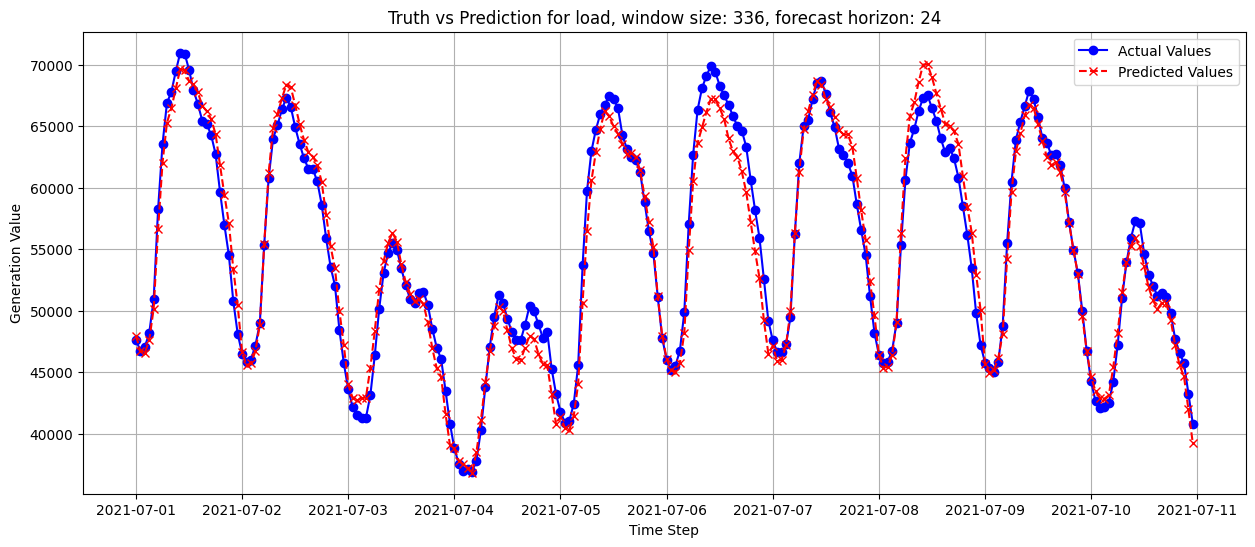

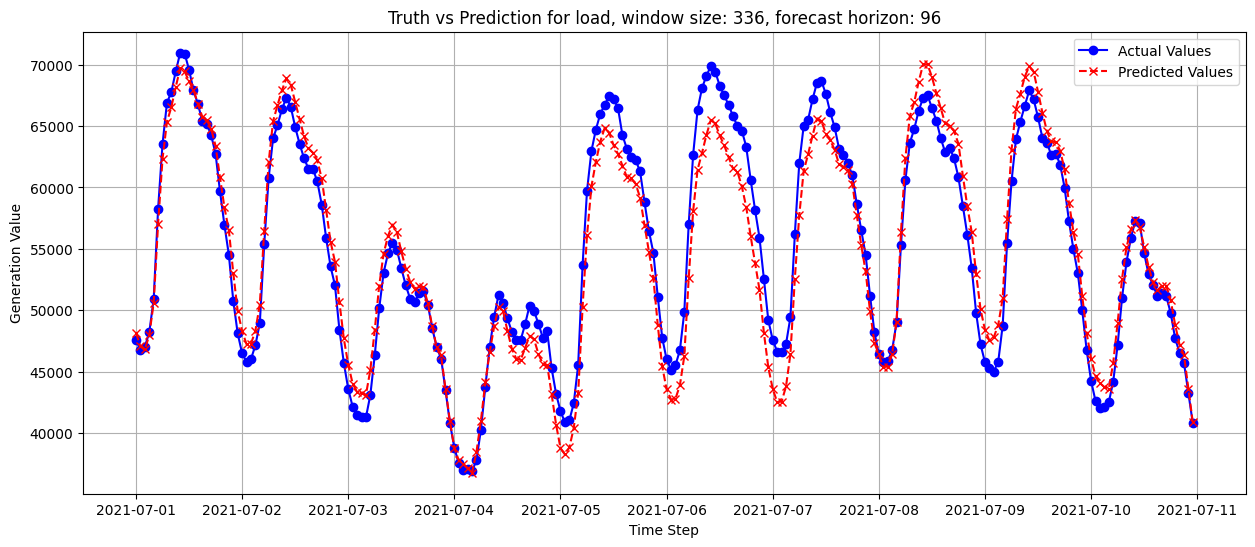

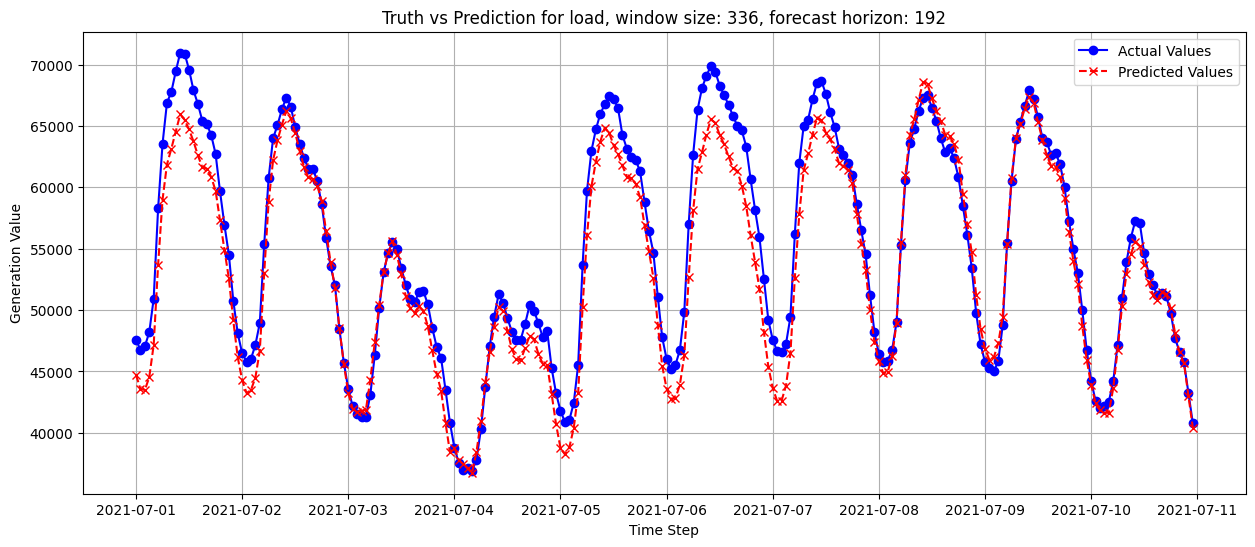

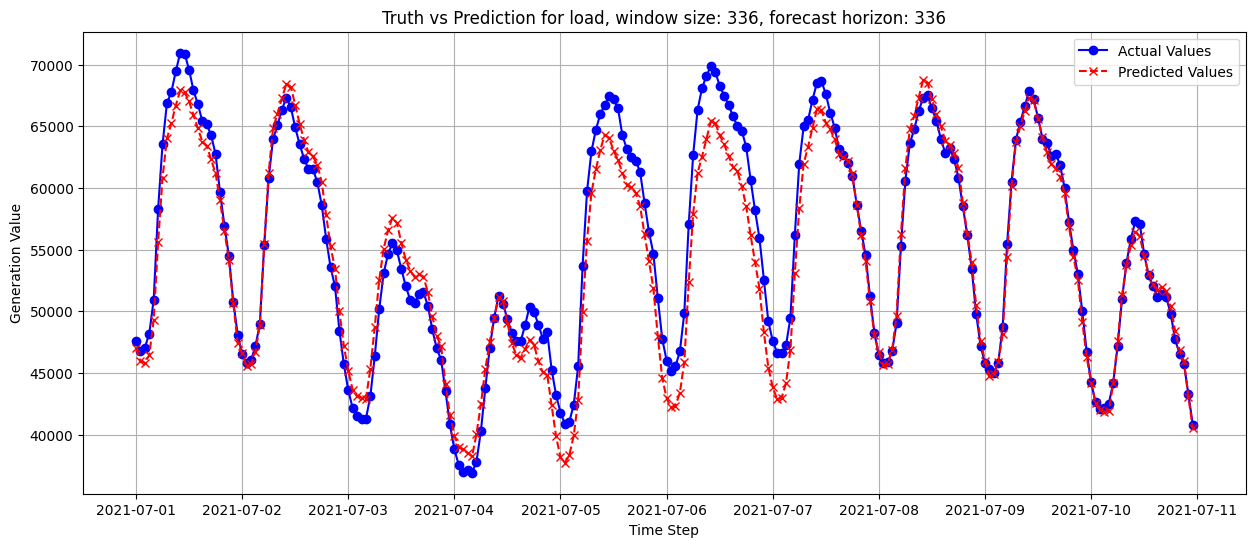

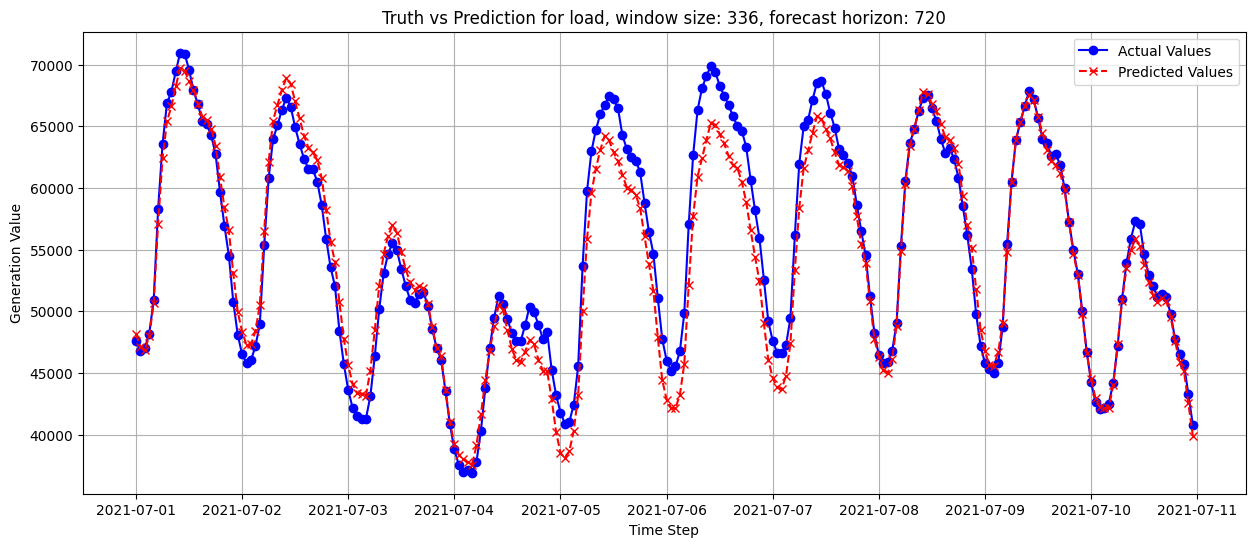

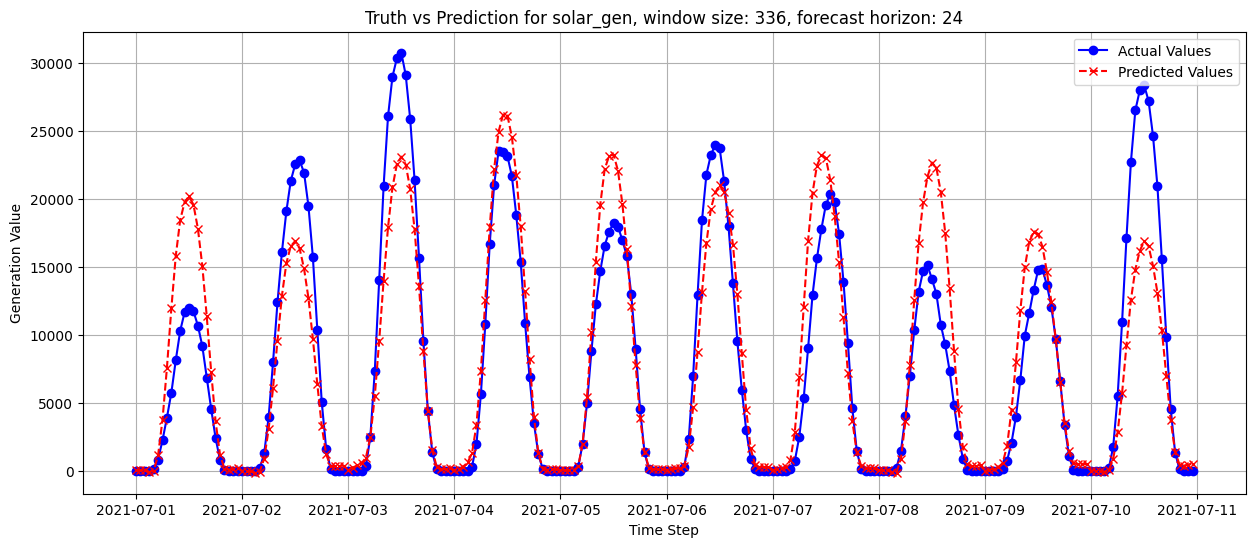

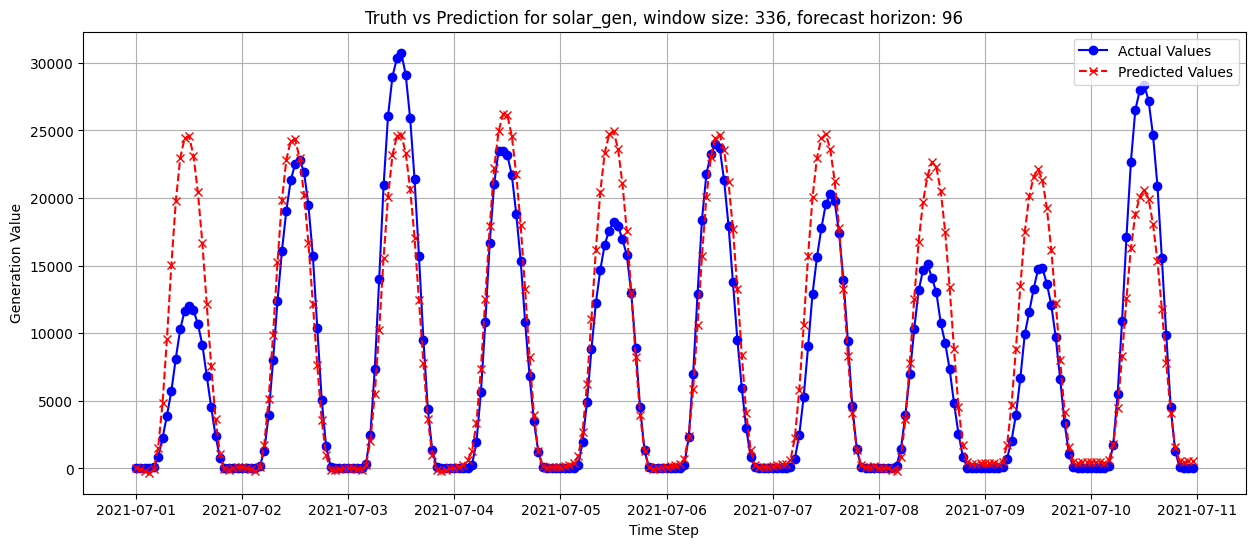

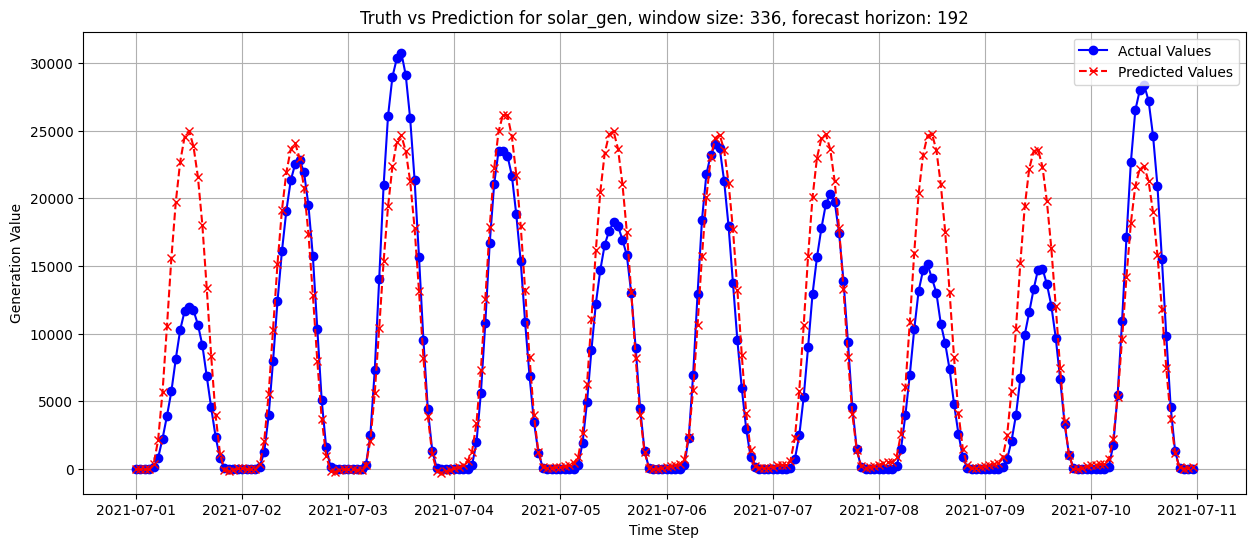

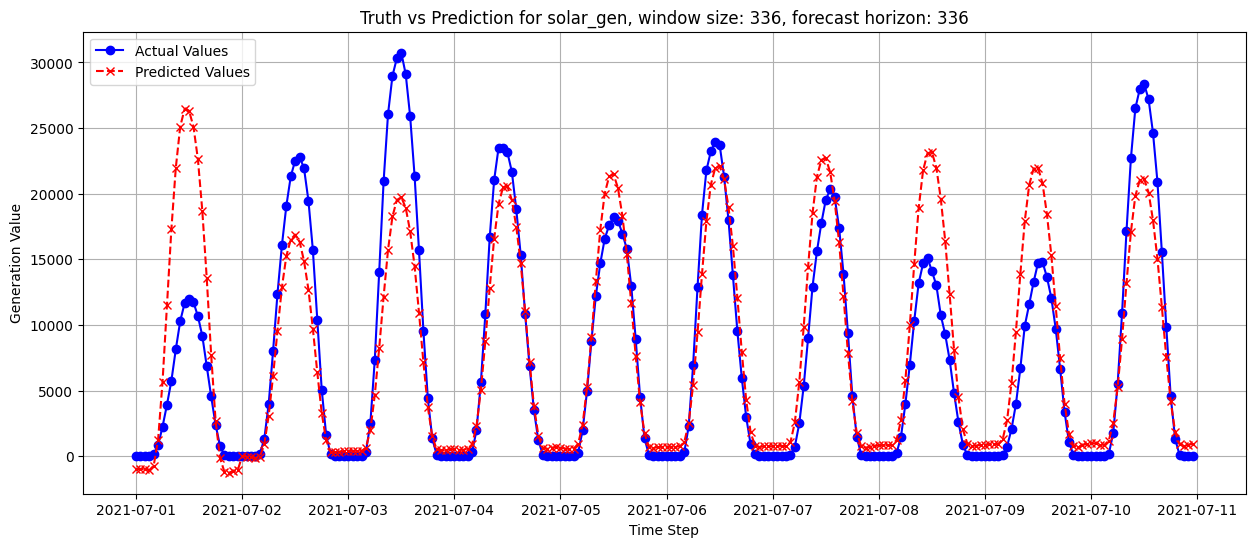

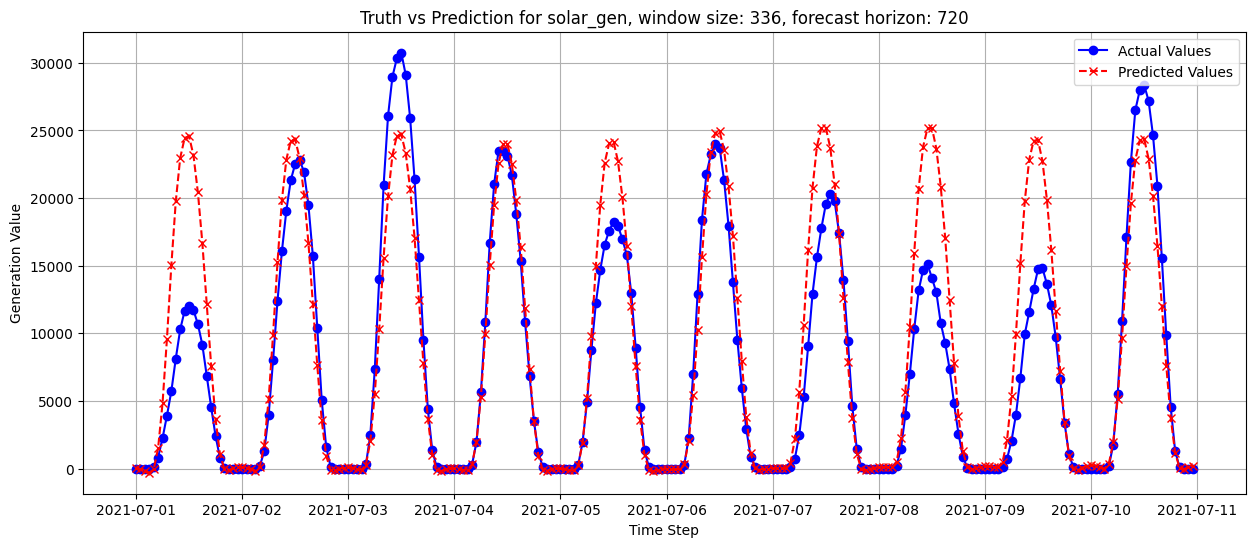

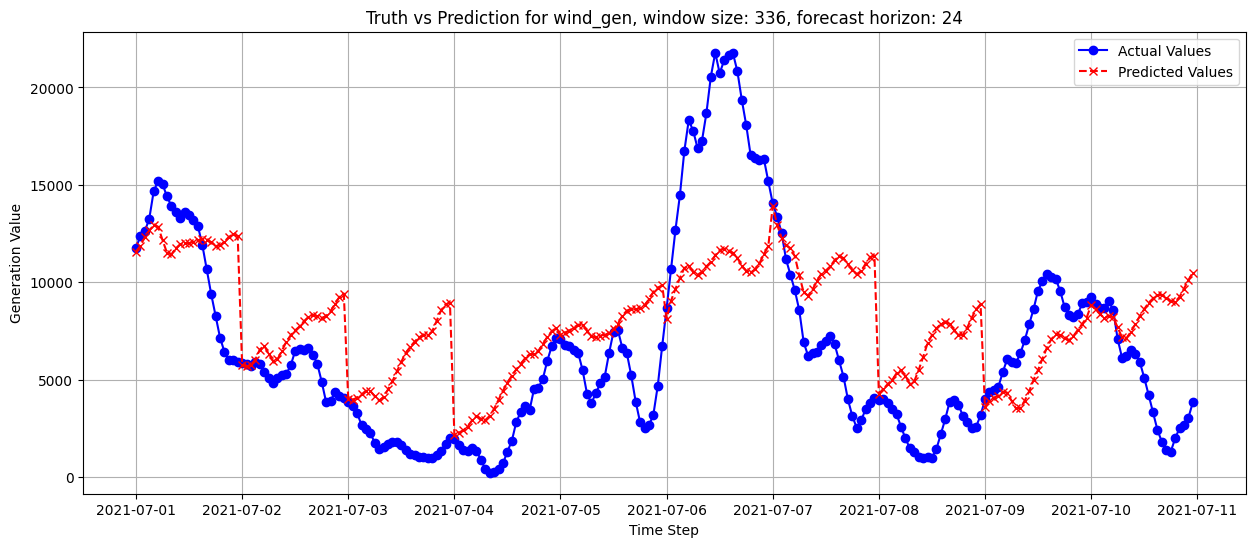

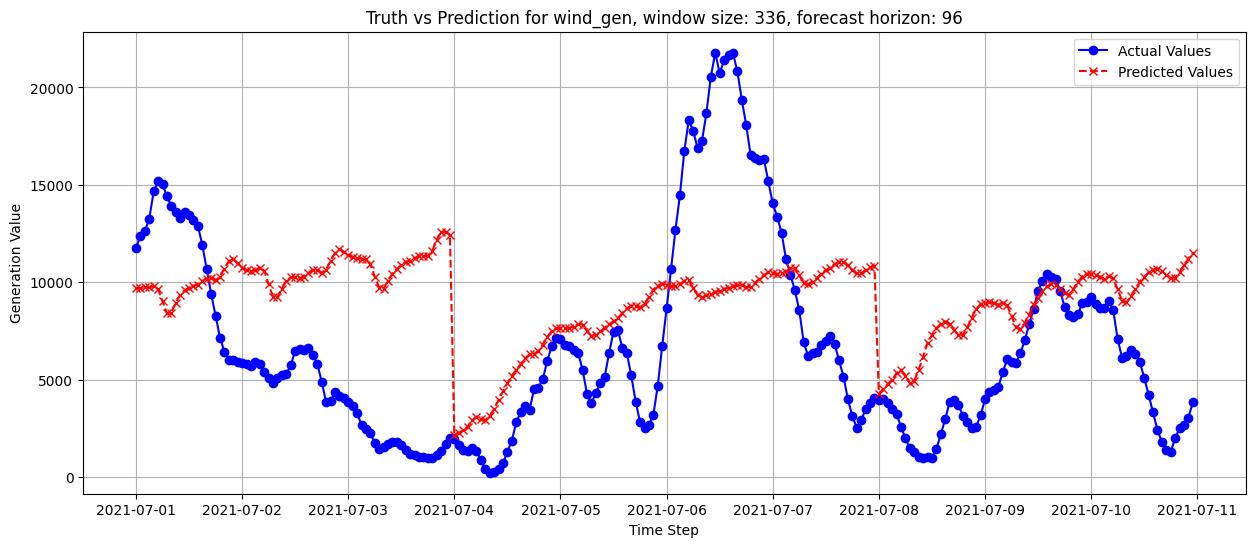

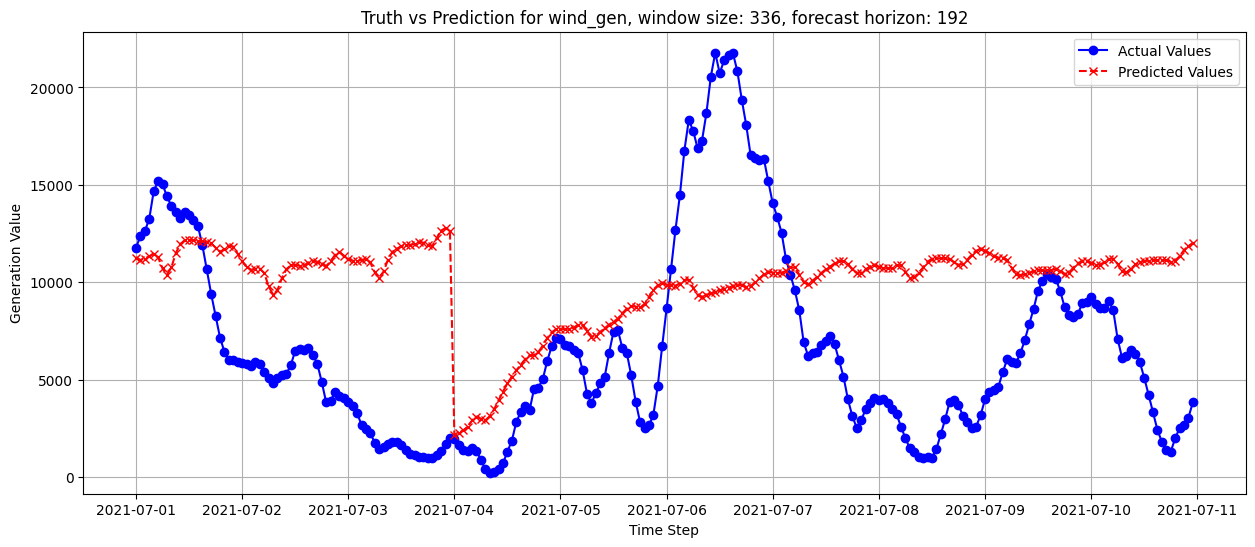

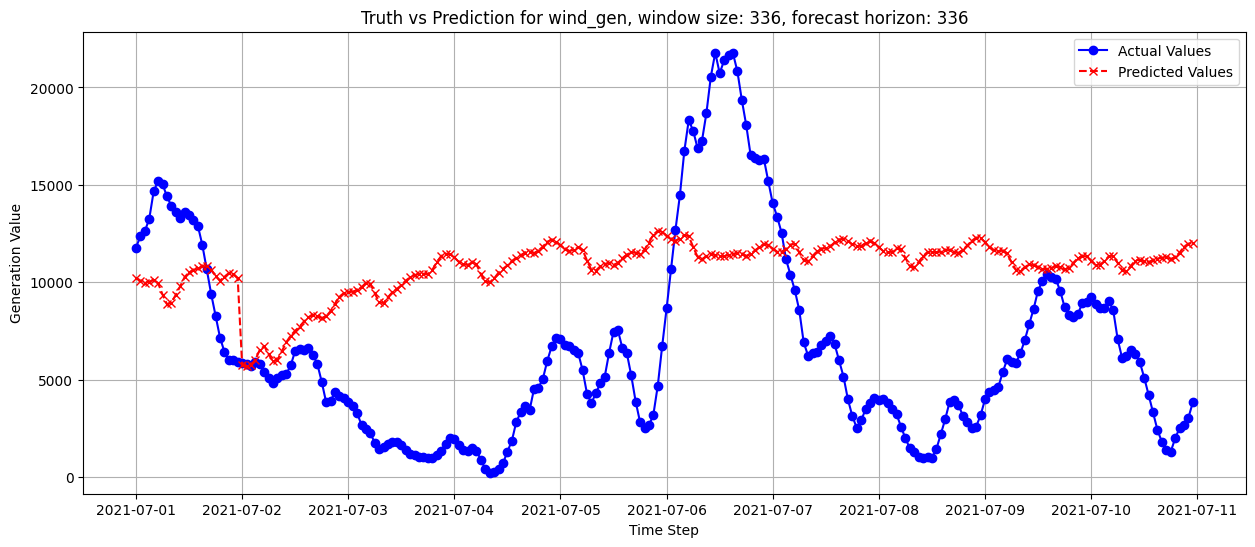

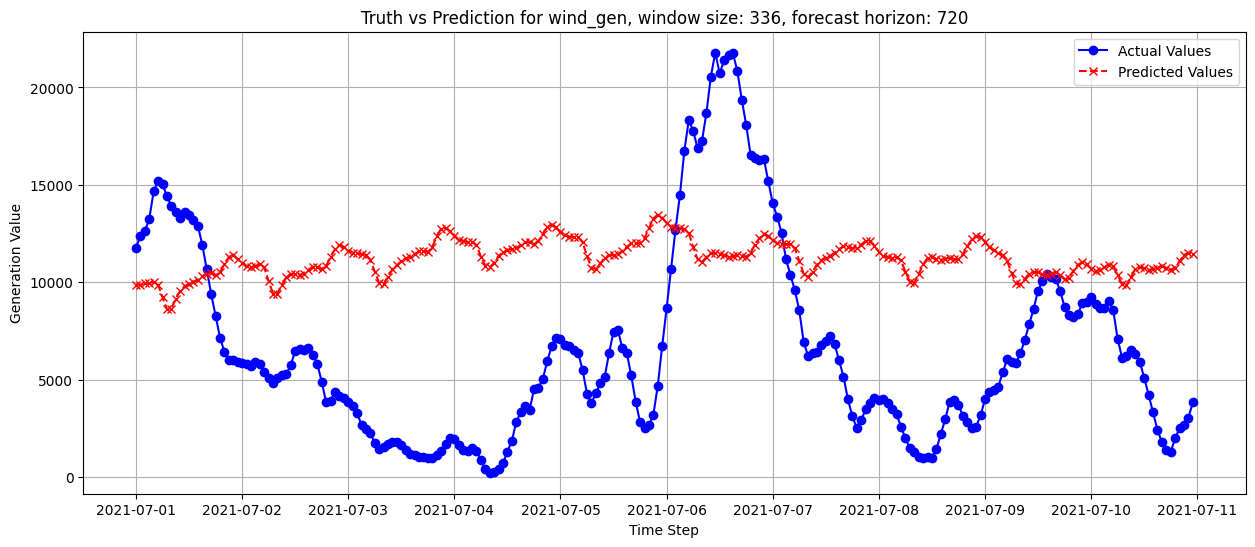

In [3]:
run_non_deepl.pipeline(args)